### Sebastián Rodríguez
### Carnet: 20003076


#                                             Proyecto Final: Titanic


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as mt
from sklearn.externals import joblib
import tensorflow as tf

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
RawTitanic = pd.read_csv("data_titanic_proyecto.csv")
RawTitanic.head(3)

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_class,passenger_sex,passenger_survived
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,Lower,M,N
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Upper,F,Y
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Lower,F,Y


In [3]:
RawTitanic.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.523008,0.381594,32.204208
std,257.353842,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,38.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
RawTitanic["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [5]:
RawTitanic["passenger_class"].value_counts()

Lower     491
Upper     216
Middle    184
Name: passenger_class, dtype: int64

In [6]:
RawTitanic["Age"] = RawTitanic["Age"].fillna(RawTitanic["Age"].median());
RawTitanic["Age"].isnull().sum()

RawTitanic["Female"] = (RawTitanic["passenger_sex"] == 'F').astype(np.float)

RawTitanic["Embarked"] = RawTitanic["Embarked"].fillna('X')
RawTitanic["Embarked_S"] = (RawTitanic["Embarked"] == 'S').astype(np.float32)
RawTitanic["Embarked_C"] = (RawTitanic["Embarked"] == 'C').astype(np.float32)
RawTitanic["Embarked_Q"] = (RawTitanic["Embarked"] == 'Q').astype(np.float32)

RawTitanic["Class_Lower"] = (RawTitanic["passenger_class"] == 'Lower').astype(np.float32)
RawTitanic["Class_Middle"] = (RawTitanic["passenger_class"] == 'Middle').astype(np.float32)
RawTitanic["Class_Upper"] = (RawTitanic["passenger_class"] == 'Upper').astype(np.float32)

RawTitanic["Survived"] = (RawTitanic["passenger_survived"].values == 'Y').astype(np.float32)
RawTitanic.head(3)

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_class,passenger_sex,passenger_survived,Female,Embarked_S,Embarked_C,Embarked_Q,Class_Lower,Class_Middle,Class_Upper,Survived
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,Lower,M,N,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Upper,F,Y,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Lower,F,Y,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [7]:

NumFields = ["Age", "SibSp", "Parch", "Fare", "Female", 
             "Embarked_S", "Embarked_C", "Embarked_Q", 
             "Class_Lower", "Class_Middle", "Class_Upper"]

y = RawTitanic["Survived"].values
X = RawTitanic[NumFields].values

X.shape, y.shape

((891, 11), (891,))

In [8]:

RawTitanic[NumFields].head(20)

,Age,SibSp,Parch,Fare,Female,Embarked_S,Embarked_C,Embarked_Q,Class_Lower,Class_Middle,Class_Upper
0,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,26.0,0,0,7.9250,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,35.0,1,0,53.1000,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5,28.0,0,0,8.4583,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6,54.0,0,0,51.8625,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7,2.0,3,1,21.0750,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8,27.0,0,2,11.1333,1.0,1.0,0.0,0.0,1.0,0.0,0.0
9,14.0,1,0,30.0708,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [9]:
DataFields = ["Age", "SibSp", "Parch", "Fare", "Female", "Embarked_S", "Embarked_C", "Embarked_Q", "Class_Lower", "Class_Middle", "Class_Upper", "Survived"]

RawTitanic[DataFields].to_csv('TitanicProcessed.csv')

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train_cv, X_test, y_train_cv, y_test = train_test_split(X, y, test_size = 0.4, shuffle = True,random_state = 314)
X_train, X_val, y_train, y_val = train_test_split(X_train_cv, y_train_cv, test_size = 0.2, random_state = 42)
X_train.shape, X_val.shape, X_test.shape

((427, 11), (107, 11), (357, 11))

In [12]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [13]:
X_train.shape

(427, 11)

In [14]:
svm_model = Pipeline([("scaler", StandardScaler()),("svc", SVC(C = 10., kernel='rbf', gamma = 0.01, tol = 0.001, max_iter = 5000))])
svm_model.fit(X_train, y_train.reshape(len(y_train), ));
svm_model.score(X_train, y_train), svm_model.score(X_val, y_val)

(0.819672131147541, 0.8130841121495327)

In [15]:
y_pred = svm_model.predict(X_val)
(mt.accuracy_score(y_val, y_pred, normalize=True), mt.f1_score(y_val, y_pred), mt.precision_score(y_val, y_pred), mt.recall_score(y_val, y_pred, average='weighted'))

(0.8130841121495327,
 0.7435897435897436,
 0.8055555555555556,
 0.8130841121495327)

In [16]:
def entrenar_svm(X, y, C_param): 
    svm_model = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(C = C_param, kernel='rbf', tol = 0.001, max_iter = 5000))])
    svm_model.fit(X, y.reshape(len(y), ))
    return svm_model

def getMetrics(modelo, X_train, y_train, X_val, y_val):
    y_pred = modelo.predict(X_train)
    trainMetrics = [mt.accuracy_score(y_train, y_pred, normalize=True), 
                    mt.f1_score(y_train, y_pred), 
                    mt.precision_score(y_train, y_pred), 
                    mt.recall_score(y_train, y_pred, average='weighted')]
    y_pred = modelo.predict(X_val)
    validationMetrics = [mt.accuracy_score(y_val, y_pred, normalize=True), 
                    mt.f1_score(y_val, y_pred), 
                    mt.precision_score(y_val, y_pred), 
                    mt.recall_score(y_val, y_pred, average='weighted')]
    
    return trainMetrics, validationMetrics

In [17]:
C_param_list = [0.1, 0.5, 1., 2., 3., 4., 5., 6., 7., 8., 9., 10., 15., 20., 25.]
trainMetricslist = []
valMetricslist = []
for c in C_param_list:
    svm = entrenar_svm(X_train, y_train, C_param = c)
    trainMetrics, valMetrics = getMetrics(svm, X_train, y_train, X_val, y_val)
    trainMetricslist.append(trainMetrics.copy())
    valMetricslist.append(valMetrics.copy())

In [18]:
svmResults = pd.DataFrame(np.column_stack((C_param_list, np.array(trainMetricslist), np.array(valMetricslist))), 
                             columns = ['C', 'AccuracyTrain', 'F1Train', 'PrecisionTrain', 'RecallTrain', 
                                       'AccuracyVal', 'F1Val', 'PrecisionVal', 'RecallVal'])
svmResults

,C,AccuracyTrain,F1Train,PrecisionTrain,RecallTrain,AccuracyVal,F1Val,PrecisionVal,RecallVal
0,0.1,0.796253,0.658824,0.875000,0.796253,0.803738,0.686567,0.920000,0.803738
1,0.5,0.829040,0.745645,0.835938,0.829040,0.813084,0.729730,0.843750,0.813084
2,1.0,0.838407,0.762887,0.840909,0.838407,0.831776,0.756757,0.875000,0.831776
3,2.0,0.840749,0.767123,0.842105,0.840749,0.813084,0.736842,0.823529,0.813084
4,3.0,0.845433,0.767606,0.872000,0.845433,0.803738,0.720000,0.818182,0.803738
5,4.0,0.850117,0.776224,0.874016,0.850117,0.785047,0.701299,0.771429,0.785047
6,5.0,0.854801,0.786207,0.870229,0.854801,0.794393,0.717949,0.777778,0.794393
7,6.0,0.852459,0.783505,0.863636,0.852459,0.766355,0.666667,0.757576,0.766355
8,7.0,0.861827,0.795848,0.884615,0.861827,0.747664,0.649351,0.714286,0.747664
9,8.0,0.859485,0.791667,0.883721,0.859485,0.757009,0.657895,0.735294,0.757009


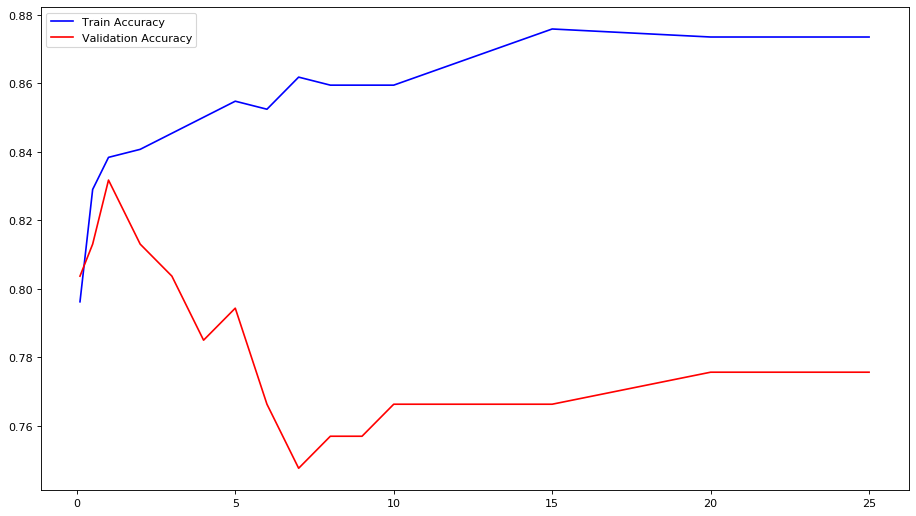

In [19]:
fig = plt.figure(figsize=(14, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(svmResults.C, svmResults.AccuracyTrain, 'b-', 
         svmResults.C, svmResults.AccuracyVal, 'r-');
plt.legend(("Train Accuracy", "Validation Accuracy"));


In [20]:
svm_final = entrenar_svm(X_train, y_train, C_param = 9)

In [21]:
from sklearn.model_selection import GridSearchCV

parameters = {'svc__C' : [0.1, 0.5, 1., 2., 3., 4., 5., 6., 7., 8., 9., 10., 15., 20., 25.], 
              'svc__gamma' : [0.1, 0.5, 1., 2., 3., 5., 7.5, 10., 15., 20., 25.]}

svc = SVC(gamma="scale")
svm_model = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel = 'rbf', tol = 0.001, max_iter = 5000))])

clf = GridSearchCV(svm_model, parameters, cv=5, iid=False, verbose=True, n_jobs=4)
clf.fit(X_train_cv, y_train_cv)

Fitting 5 folds for each of 165 candidates, totalling 825 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 234 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 825 out of 825 | elapsed:    4.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svc',
                                        SVC(C=1.0, cache_size=200,
                                            class_weight=None, coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='auto_deprecated',
                                            kernel='rbf', max_iter=5000,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
              

In [22]:
clf.best_params_

{'svc__C': 0.5, 'svc__gamma': 0.1}

In [23]:
svm_model = Pipeline([("scaler", StandardScaler()),("svc", SVC(C = 3.0, gamma = 0.1, kernel='rbf', tol = 0.001, max_iter = 5000))])
svm_model.fit(X_train_cv, y_train_cv.reshape(len(y_train_cv), ))
getMetrics(svm_model, X_train, y_train, X_val, y_val)

([0.8407494145199064,
  0.7671232876712328,
  0.8421052631578947,
  0.8407494145199064],
 [0.8411214953271028,
  0.7733333333333333,
  0.8787878787878788,
  0.8411214953271028])

In [24]:
import tensorflow as tf

In [25]:
def entrenar_reg_logistica(Xtrain, Ytrain, lr, lambda_val, epochs):
    import time
    m, k = Xtrain.shape
    
    tf.reset_default_graph()
    g = tf.Graph()
    with g.as_default():
        X = tf.placeholder(tf.float32, shape = (None, k), name = "X")
        Ylabels = tf.placeholder(tf.float32, name = "Ylabels")
        lr_param = tf.placeholder(tf.float32, name = "lr")
        lambda_param = tf.placeholder(tf.float32, name = "lambda")
        
        W = tf.Variable(tf.truncated_normal(shape = [k, 1]), name = "W")
        b = tf.Variable(tf.truncated_normal(shape = (1, 1)), name = "b")
        
        with tf.name_scope("Logits"):
            Logits = tf.add(tf.matmul(X, W), b, name = "Logits")
            YlabelsHat = tf.nn.sigmoid(Logits)

        with tf.name_scope("FuncionCosto"):
            w_norm = tf.divide(tf.multiply(tf.multiply(tf.constant(0.5), lambda_param), 
                                 tf.reduce_sum(tf.square(W))), tf.cast(m, tf.float32), name = "W_norm")

            classif_term = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
                labels = Ylabels, logits = Logits), name = "CostoClasif") 

            cost = tf.add(classif_term, w_norm, name="Costo")

        with tf.name_scope("GradientDes.Optimizer"):
            optimizer = tf.train.GradientDescentOptimizer(lr_param).minimize(cost) 
 
        init = tf.global_variables_initializer() 

    start = time.time()
    with tf.Session(graph = g) as sess: 

        sess.run(init)
        for epoch in range(epochs):
            _, c_ = sess.run([optimizer, cost], 
                             feed_dict = {X : Xtrain, Ylabels : Ytrain.reshape((m, 1)), 
                                          lr_param : lr, lambda_param : lambda_val})
            if (epoch + 1) % round(epochs*0.1) == 0:
                print("Epoch: %d, \t costo = %0.4f" % (epoch+1, c_))
        w_, b_ = sess.run([W, b])
        
    end = time.time()
    print("Tiempo transcurrido: %0.2f segundos" % (end-start))
    return w_, b_

In [26]:

w_, b_ = entrenar_reg_logistica(X_train, y_train, lr = 0.001, epochs = 1000, lambda_val = 8.)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch: 100, 	 costo = 0.9096
Epoch: 200, 	 costo = 0.8615
Epoch: 300, 	 costo = 0.8528
Epoch: 400, 	 costo = 0.8443
Epoch: 500, 	 costo = 0.8359
Epoch: 600, 	 costo = 0.8278
Epoch: 700, 	 costo = 0.8198
Epoch: 800, 	 costo = 0.8120
Epoch: 900, 	 costo = 0.8043
Epoch: 1000, 	 costo = 0.7969
Tiempo transcurrido: 0.96 segundos


In [27]:
def predecirLogistica(x, weights, b):
    def sigmoid(x):
        return (1 / (1 + np.exp(-x)))
    l = np.matmul(x, weights) + b
    y_hat = 1.0*(sigmoid(l) > 0.5)
    return y_hat

In [28]:
(mt.accuracy_score(y_train, predecirLogistica(X_train, w_, b_)), 
mt.accuracy_score(y_val, predecirLogistica(X_val, w_, b_)) )

(0.639344262295082, 0.6448598130841121)

In [29]:
def getMetricsLog(w, b, X_train, y_train, X_val, y_val):
    y_pred = predecirLogistica(X_train, w, b)
    trainMetrics = [mt.accuracy_score(y_train, y_pred, normalize=True), 
                    mt.f1_score(y_train, y_pred), 
                    mt.precision_score(y_train, y_pred), 
                    mt.recall_score(y_train, y_pred, average='weighted')]

    y_pred = predecirLogistica(X_val, w, b)
    validationMetrics = [mt.accuracy_score(y_val, y_pred, normalize=True), 
                    mt.f1_score(y_val, y_pred), 
                    mt.precision_score(y_val, y_pred), 
                    mt.recall_score(y_val, y_pred, average='weighted')]
    
    return trainMetrics, validationMetrics

In [30]:

RawTitanic[NumFields].head(2)

,Age,SibSp,Parch,Fare,Female,Embarked_S,Embarked_C,Embarked_Q,Class_Lower,Class_Middle,Class_Upper
0,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [31]:
varFilter = [0,3,4,5,6,7,8,9,10]

lambda_param_list = [0.1, 0.5, 1., 2., 3., 4., 5., 6., 7., 8., 9., 10., 15., 20., 25.]
trainMetricslist = []
valMetricslist = []
for lam in lambda_param_list:
    w_, b_ = entrenar_reg_logistica(X_train[:, varFilter], y_train, 
                                    lr = 0.001, epochs = 1000, 
                                    lambda_val = lam)
    trainMetrics, valMetrics = getMetricsLog(w_, b_, 
                                             X_train[:, varFilter], y_train, 
                                             X_val[:, varFilter], y_val)
    trainMetricslist.append(trainMetrics.copy())
    valMetricslist.append(valMetrics.copy())

Epoch: 100, 	 costo = 0.6679
Epoch: 200, 	 costo = 0.6651
Epoch: 300, 	 costo = 0.6623
Epoch: 400, 	 costo = 0.6596
Epoch: 500, 	 costo = 0.6569
Epoch: 600, 	 costo = 0.6542
Epoch: 700, 	 costo = 0.6516
Epoch: 800, 	 costo = 0.6491
Epoch: 900, 	 costo = 0.6465
Epoch: 1000, 	 costo = 0.6440
Tiempo transcurrido: 0.59 segundos
Epoch: 100, 	 costo = 0.6145
Epoch: 200, 	 costo = 0.6127
Epoch: 300, 	 costo = 0.6108
Epoch: 400, 	 costo = 0.6090
Epoch: 500, 	 costo = 0.6072
Epoch: 600, 	 costo = 0.6054
Epoch: 700, 	 costo = 0.6037
Epoch: 800, 	 costo = 0.6019
Epoch: 900, 	 costo = 0.6002
Epoch: 1000, 	 costo = 0.5985
Tiempo transcurrido: 0.71 segundos
Epoch: 100, 	 costo = 15.6935
Epoch: 200, 	 costo = 0.7198
Epoch: 300, 	 costo = 0.7069
Epoch: 400, 	 costo = 0.7046
Epoch: 500, 	 costo = 0.7022
Epoch: 600, 	 costo = 0.6999
Epoch: 700, 	 costo = 0.6977
Epoch: 800, 	 costo = 0.6954
Epoch: 900, 	 costo = 0.6932
Epoch: 1000, 	 costo = 0.6910
Tiempo transcurrido: 0.62 segundos
Epoch: 100, 	 costo =

In [32]:
regLogResults = pd.DataFrame(np.column_stack((lambda_param_list, np.array(trainMetricslist), np.array(valMetricslist))), 
                             columns = ['Lambda', 'AccuracyTrain', 'F1Train', 'PrecisionTrain', 'RecallTrain', 
                                       'AccuracyVal', 'F1Val', 'PrecisionVal', 'RecallVal'])
regLogResults

,Lambda,AccuracyTrain,F1Train,PrecisionTrain,RecallTrain,AccuracyVal,F1Val,PrecisionVal,RecallVal
0,0.1,0.695550,0.557823,0.607407,0.695550,0.691589,0.592593,0.615385,0.691589
1,0.5,0.688525,0.555184,0.592857,0.688525,0.663551,0.513514,0.593750,0.663551
2,1.0,0.632319,0.308370,0.514706,0.632319,0.560748,0.203390,0.352941,0.560748
3,2.0,0.615925,0.493827,0.484848,0.615925,0.560748,0.459770,0.444444,0.560748
4,3.0,0.557377,0.264591,0.346939,0.557377,0.476636,0.243243,0.281250,0.476636
5,4.0,0.695550,0.569536,0.601399,0.695550,0.644860,0.525000,0.552632,0.644860
6,5.0,0.625293,0.360000,0.494505,0.625293,0.598131,0.358209,0.480000,0.598131
7,6.0,0.651054,0.273171,0.608696,0.651054,0.635514,0.235294,0.666667,0.635514
8,7.0,0.601874,0.433333,0.460993,0.601874,0.523364,0.385542,0.390244,0.523364
9,8.0,0.679157,0.562300,0.571429,0.679157,0.626168,0.512195,0.525000,0.626168


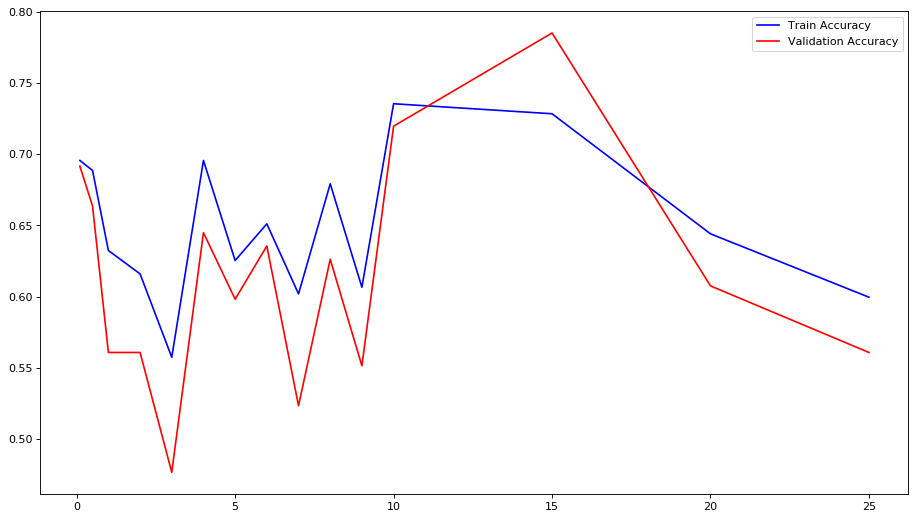

In [33]:
fig = plt.figure(figsize=(14, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(regLogResults.Lambda, regLogResults.AccuracyTrain, 'b-', 
         regLogResults.Lambda, regLogResults.AccuracyVal, 'r-');
plt.legend(("Train Accuracy", "Validation Accuracy"));

In [34]:
varFilter = [0,3,4,8,9,10]

lambda_param_list = [0.1, 0.5, 1., 2., 3., 4., 5., 6., 7., 8., 9., 10., 15., 20., 25.]
trainMetricslist = []
valMetricslist = []
for lam in lambda_param_list:
    w_, b_ = entrenar_reg_logistica(X_train[:, varFilter], y_train, 
                                    lr = 0.001, epochs = 1000, 
                                    lambda_val = lam)

    trainMetrics, valMetrics = getMetricsLog(w_, b_, 
                                             X_train[:, varFilter], y_train, 
                                             X_val[:, varFilter], y_val)
    trainMetricslist.append(trainMetrics.copy())
    valMetricslist.append(valMetrics.copy())

Epoch: 100, 	 costo = 0.8980
Epoch: 200, 	 costo = 0.8941
Epoch: 300, 	 costo = 0.8905
Epoch: 400, 	 costo = 0.8869
Epoch: 500, 	 costo = 0.8833
Epoch: 600, 	 costo = 0.8798
Epoch: 700, 	 costo = 0.8762
Epoch: 800, 	 costo = 0.8727
Epoch: 900, 	 costo = 0.8692
Epoch: 1000, 	 costo = 0.8658
Tiempo transcurrido: 0.64 segundos
Epoch: 100, 	 costo = 5.8053
Epoch: 200, 	 costo = 0.5825
Epoch: 300, 	 costo = 0.5814
Epoch: 400, 	 costo = 0.5803
Epoch: 500, 	 costo = 0.5792
Epoch: 600, 	 costo = 0.5781
Epoch: 700, 	 costo = 0.5770
Epoch: 800, 	 costo = 0.5760
Epoch: 900, 	 costo = 0.5749
Epoch: 1000, 	 costo = 0.5739
Tiempo transcurrido: 0.67 segundos
Epoch: 100, 	 costo = 1.1849
Epoch: 200, 	 costo = 0.9414
Epoch: 300, 	 costo = 0.9375
Epoch: 400, 	 costo = 0.9337
Epoch: 500, 	 costo = 0.9298
Epoch: 600, 	 costo = 0.9260
Epoch: 700, 	 costo = 0.9223
Epoch: 800, 	 costo = 0.9185
Epoch: 900, 	 costo = 0.9148
Epoch: 1000, 	 costo = 0.9111
Tiempo transcurrido: 0.66 segundos
Epoch: 100, 	 costo = 

In [35]:
regLogResults = pd.DataFrame(np.column_stack((lambda_param_list, np.array(trainMetricslist), np.array(valMetricslist))), 
                             columns = ['Lambda', 'AccuracyTrain', 'F1Train', 'PrecisionTrain', 'RecallTrain', 
                                       'AccuracyVal', 'F1Val', 'PrecisionVal', 'RecallVal'])
regLogResults

,Lambda,AccuracyTrain,F1Train,PrecisionTrain,RecallTrain,AccuracyVal,F1Val,PrecisionVal,RecallVal
0,0.1,0.592506,0.292683,0.413793,0.592506,0.532710,0.193548,0.300000,0.532710
1,0.5,0.728337,0.588652,0.674797,0.728337,0.719626,0.571429,0.714286,0.719626
2,1.0,0.585480,0.199095,0.354839,0.585480,0.551402,0.142857,0.285714,0.551402
3,2.0,0.515222,0.298305,0.323529,0.515222,0.457944,0.256410,0.277778,0.457944
4,3.0,0.585480,0.253165,0.384615,0.585480,0.598131,0.245614,0.466667,0.598131
5,4.0,0.601874,0.365672,0.449541,0.601874,0.504673,0.311688,0.342857,0.504673
6,5.0,0.779859,0.692810,0.721088,0.779859,0.794393,0.725000,0.763158,0.794393
7,6.0,0.686183,0.496241,0.616822,0.686183,0.644860,0.441176,0.576923,0.644860
8,7.0,0.641686,0.288372,0.553571,0.641686,0.635514,0.264151,0.636364,0.635514
9,8.0,0.683841,0.474708,0.622449,0.683841,0.635514,0.417910,0.560000,0.635514


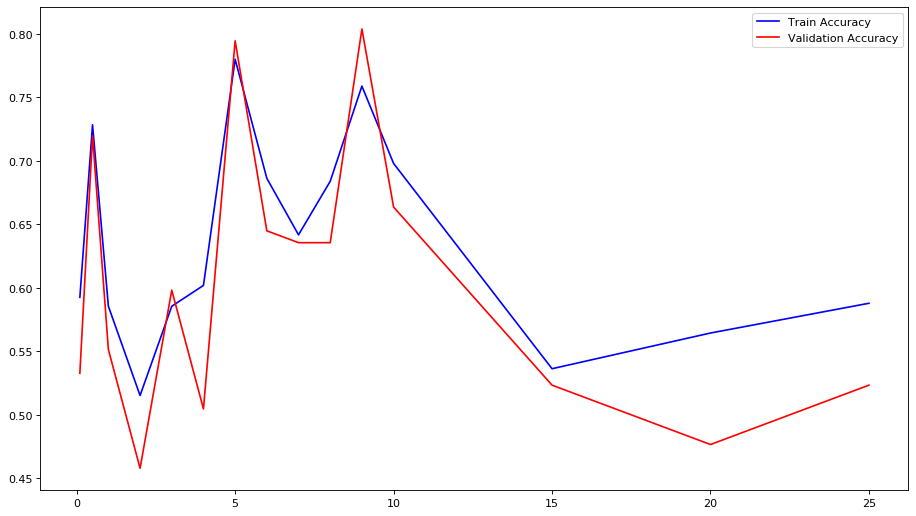

In [36]:
fig = plt.figure(figsize=(14, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(regLogResults.Lambda, regLogResults.AccuracyTrain, 'b-', 
         regLogResults.Lambda, regLogResults.AccuracyVal, 'r-');
plt.legend(("Train Accuracy", "Validation Accuracy"));

In [37]:
varFilter = [0,3,4,8,9,10]

w_, b_ = entrenar_reg_logistica(X_train[:, varFilter], y_train, 
                                lr = 0.001, epochs = 3000, lambda_val = 6)
(mt.accuracy_score(y_train, predecirLogistica(X_train[:, varFilter], w_, b_)), 
mt.accuracy_score(y_val, predecirLogistica(X_val[:, varFilter], w_, b_)) )

Epoch: 300, 	 costo = 0.5928
Epoch: 600, 	 costo = 0.5899
Epoch: 900, 	 costo = 0.5871
Epoch: 1200, 	 costo = 0.5844
Epoch: 1500, 	 costo = 0.5818
Epoch: 1800, 	 costo = 0.5793
Epoch: 2100, 	 costo = 0.5769
Epoch: 2400, 	 costo = 0.5746
Epoch: 2700, 	 costo = 0.5723
Epoch: 3000, 	 costo = 0.5702
Tiempo transcurrido: 1.81 segundos


(0.7517564402810304, 0.7383177570093458)

In [38]:
from sklearn.naive_bayes import GaussianNB

def obtenerNaiveBayes(X, y, varFilter):
    model = GaussianNB()
    model.fit(X[:, varFilter], y.reshape(len(y),))
    return model

In [39]:
naive1 = obtenerNaiveBayes(X_train, y_train, [0,1,2,3,4,5,6,7,8,9,10])
getMetrics(naive1, X_train, y_train, X_val, y_val)

([0.7611241217798594,
  0.6730769230769231,
  0.6862745098039216,
  0.7611241217798594],
 [0.7476635514018691,
  0.6666666666666666,
  0.6923076923076923,
  0.7476635514018691])

In [40]:
combinaciones = [[0,1,2,3,4,5,6,7,8,9,10], [0,3,4,8,9,10], [0,3,4,8,9,10], [0,1,2,3,4,5,6,7], [0,3,4,5,6,7,8,9,10], [0,1,3,5,6,7], [0,3,8,9,10], [0,4,5,6,7,8,9,10]]
trainMetricslist = []
valMetricslist = []

for combFilter in combinaciones: 
    mNB = obtenerNaiveBayes(X_train, y_train, combFilter)
    trainMetrics, valMetrics = getMetrics(mNB, X_train[:, combFilter], y_train, 
                                          X_val[:, combFilter], y_val)
    trainMetricslist.append(trainMetrics.copy())
    valMetricslist.append(valMetrics.copy())

In [41]:
resultadosNB = pd.DataFrame(np.column_stack((combinaciones, np.array(trainMetricslist), np.array(valMetricslist))), 
                             columns = ['Variables', 'AccuracyTrain', 'F1Train', 'PrecisionTrain', 'RecallTrain', 
                                       'AccuracyVal', 'F1Val', 'PrecisionVal', 'RecallVal'])
resultadosNB

,Variables,AccuracyTrain,F1Train,PrecisionTrain,RecallTrain,AccuracyVal,F1Val,PrecisionVal,RecallVal
0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",0.761124,0.673077,0.686275,0.761124,0.747664,0.666667,0.692308,0.747664
1,"[0, 3, 4, 8, 9, 10]",0.765808,0.632353,0.761062,0.765808,0.785047,0.693333,0.787879,0.785047
2,"[0, 3, 4, 8, 9, 10]",0.765808,0.632353,0.761062,0.765808,0.785047,0.693333,0.787879,0.785047
3,"[0, 1, 2, 3, 4, 5, 6, 7]",0.740047,0.685552,0.623711,0.740047,0.728972,0.674157,0.638298,0.728972
4,"[0, 3, 4, 5, 6, 7, 8, 9, 10]",0.791569,0.698305,0.757353,0.791569,0.757009,0.675,0.710526,0.757009
5,"[0, 1, 3, 5, 6, 7]",0.662763,0.496503,0.559055,0.662763,0.635514,0.465753,0.548387,0.635514
6,"[0, 3, 8, 9, 10]",0.669789,0.498221,0.57377,0.669789,0.700935,0.542857,0.678571,0.700935
7,"[0, 4, 5, 6, 7, 8, 9, 10]",0.775176,0.690323,0.708609,0.775176,0.719626,0.651163,0.636364,0.719626


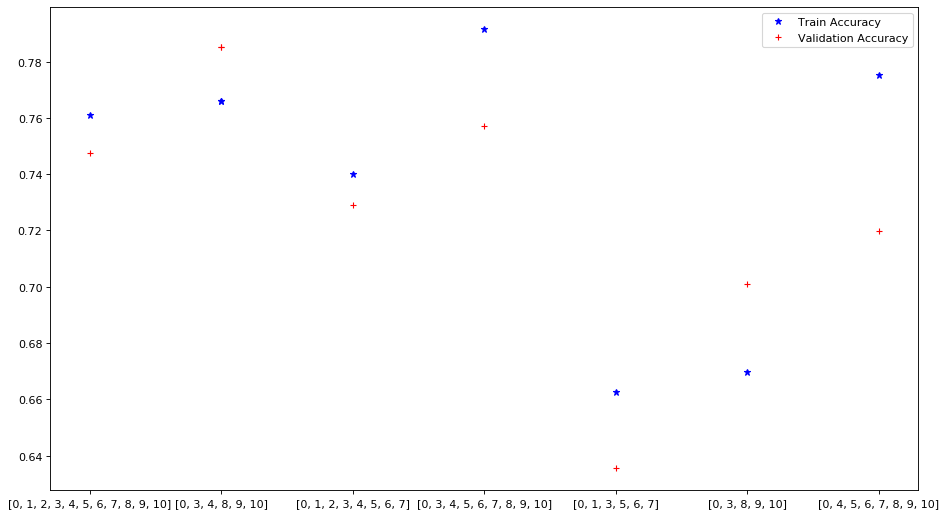

In [42]:
fig = plt.figure(figsize=(14, 8), dpi= 80, facecolor='w', edgecolor='k')
combinaciones_str = [str(comb) for comb in combinaciones]
plt.plot(combinaciones_str, resultadosNB.AccuracyTrain, 'b*',
         combinaciones_str, resultadosNB.AccuracyVal, 'r+');
plt.legend(("Train Accuracy", "Validation Accuracy"));

In [43]:
finalNBFilter = [0,4,5,6,7,8,9,10]
mNB_final = obtenerNaiveBayes(X_train_cv, y_train_cv, finalNBFilter)

(mt.accuracy_score(y_train, mNB_final.predict(X_train[:, finalNBFilter])), 
mt.accuracy_score(y_val, mNB_final.predict(X_val[:, finalNBFilter])), 
mt.accuracy_score(y_train_cv, mNB_final.predict(X_train_cv[:, finalNBFilter])))

(0.8032786885245902, 0.7663551401869159, 0.795880149812734)

In [44]:
def probFeature(pdDataFrame, featureName, x, qsize):
    f, bins_f = pd.qcut(pdDataFrame[featureName], qsize, retbins=True, duplicates='drop')
    rango = pd.cut(x, bins = bins_f)

    if rango.isnull().any():
        return 0, bins_f
    return (f.value_counts()[rango] / len(f)).values, bins_f

def probFeatureDadoLabel(pdDataFrame, featureName, x, className, label, bins_f):
    # Obtener las categorías de pdFeature y los bins 
    f = pd.cut(pdDataFrame.loc[pdDataFrame[className] == label , featureName], 
               bins = bins_f, include_lowest=True)
    rango = pd.cut(x, bins = bins_f, include_lowest=True)
    
    if rango.isnull().any():
        return np.zeros(len(x))
    
    return (f.value_counts()[rango] / len(f)).values

def probLabel(pdDataFrame, className, label):
    p = pdDataFrame.loc[pdDataFrame[className] == label, className].count() / len(pdDataFrame)
    return p

def probLabelDadoLabel(pdDataFrame, featureName, x, className, label):
    pClass = pdDataFrame.loc[(pdDataFrame[className] == label), featureName].count()
    pInt = pdDataFrame.loc[(pdDataFrame[className] == label)&(pdDataFrame[featureName] == 1), featureName].count()
    
    pLabel = pInt/pClass
    pNotLabel = 1. - pLabel
    prob = np.array([pNotLabel, pLabel])
    return prob[x.astype(int)]

def predecirNBTitanic(Titanic, TitanicEval):
    age = TitanicEval.Age.values
    fare = TitanicEval.Fare.values
    _, binsAge = probFeature(Titanic, "Age", age, 5)
    _, binsFare = probFeature(Titanic, "Fare", fare, 5)
    
    BinaryFields = ["Female"]
    
    survived_list = [0,1]
    p_survived = []
    for survived in survived_list:
        pAgeGivenS = probFeatureDadoLabel(Titanic, "Age", age, "Survived", survived, binsAge)
        pFareGivenS = probFeatureDadoLabel(Titanic, "Fare", fare, "Survived", survived, binsFare)
        pbinaryFeature = np.ones(len(TitanicEval.values))
        for binaryFeature in BinaryFields:
            pbinaryFeature = probLabelDadoLabel(Titanic, binaryFeature, 
                                                TitanicEval[binaryFeature].values, 
                                                "Survived", survived)
        pSurvived = probLabel(Titanic, "Survived", survived)
        p_survived.append( (pAgeGivenS * pFareGivenS * pbinaryFeature) * pSurvived )

    p_survived = np.array(p_survived)
    p_survived_yes = p_survived[1,:] / np.sum(p_survived, axis=0)
    return np.array([p > 0.5 for p in p_survived_yes]).astype(np.float)

In [45]:
NBFieldsTrain = ["Age", "Fare", "Female", "Embarked_S", "Embarked_C", "Embarked_Q", 
             "Class_Lower", "Class_Middle", "Class_Upper", "Survived"]
NB_freq_varFilter = [0,3,4,5,6,7,8,9,10]
Titanic_train = pd.DataFrame(np.column_stack(
    (X_train[:, NB_freq_varFilter], y_train)), columns=NBFieldsTrain)

In [46]:
yhat_NBmanual_train = predecirNBTitanic(Titanic_train, Titanic_train)
yhat_NBmanual_train

mt.accuracy_score(y_train, yhat_NBmanual_train)

0.7962529274004684

In [47]:
NBFieldsEval = ["Age", "Fare", "Female", "Embarked_S", "Embarked_C", "Embarked_Q", 
             "Class_Lower", "Class_Middle", "Class_Upper"]
 
Titanic_val = pd.DataFrame(X_val[:, NB_freq_varFilter], columns=NBFieldsEval)

In [48]:
# Obtener los valores dados por el NB frecuentista
#yhat_NBmanual_val = predecirNBTitanic(Titanic_train, Titanic_val)
#yhat_NBmanual_val

# Computar las métricas sobre el conjunto de entrenamiento
#mt.accuracy_score(y_val, yhat_NBmanual_val)

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [50]:
def entrenarArbolDecision(X, y, max_depth): 
    tree_model = tree.DecisionTreeClassifier(max_depth = max_depth)
    tree_model.fit(X, y)
    return tree_model

entrenarArbolDecision(X_train, y_train, 2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [51]:
trainMetricslist = []
valMetricslist = []
depth_list = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
for depth in depth_list: 
    tree_model = entrenarArbolDecision(X_train, y_train, depth)
    trainMetrics, valMetrics = getMetrics(tree_model, X_train, y_train, X_val, y_val)
    trainMetricslist.append(trainMetrics.copy())
    valMetricslist.append(valMetrics.copy())

In [52]:
treeResults = pd.DataFrame(np.column_stack((depth_list, np.array(trainMetricslist), np.array(valMetricslist))), 
                             columns = ['Profundidad', 'AccuracyTrain', 'F1Train', 'PrecisionTrain', 'RecallTrain', 
                                       'AccuracyVal', 'F1Val', 'PrecisionVal', 'RecallVal'])
treeResults

,Profundidad,AccuracyTrain,F1Train,PrecisionTrain,RecallTrain,AccuracyVal,F1Val,PrecisionVal,RecallVal
0,2.0,0.782201,0.693069,0.729167,0.782201,0.813084,0.750000,0.789474,0.813084
1,3.0,0.826698,0.735714,0.851240,0.826698,0.813084,0.729730,0.843750,0.813084
2,4.0,0.838407,0.747253,0.894737,0.838407,0.813084,0.729730,0.843750,0.813084
3,5.0,0.868852,0.813333,0.865248,0.868852,0.822430,0.765432,0.794872,0.822430
4,6.0,0.882904,0.835526,0.875862,0.882904,0.831776,0.780488,0.800000,0.831776
5,7.0,0.896956,0.848276,0.938931,0.896956,0.831776,0.763158,0.852941,0.831776
6,8.0,0.911007,0.865248,0.991870,0.911007,0.859813,0.794521,0.935484,0.859813
7,9.0,0.932084,0.901024,0.985075,0.932084,0.859813,0.805195,0.885714,0.859813
8,10.0,0.948478,0.927152,0.979021,0.948478,0.831776,0.775000,0.815789,0.831776
9,11.0,0.957845,0.940000,1.000000,0.957845,0.803738,0.746988,0.756098,0.803738


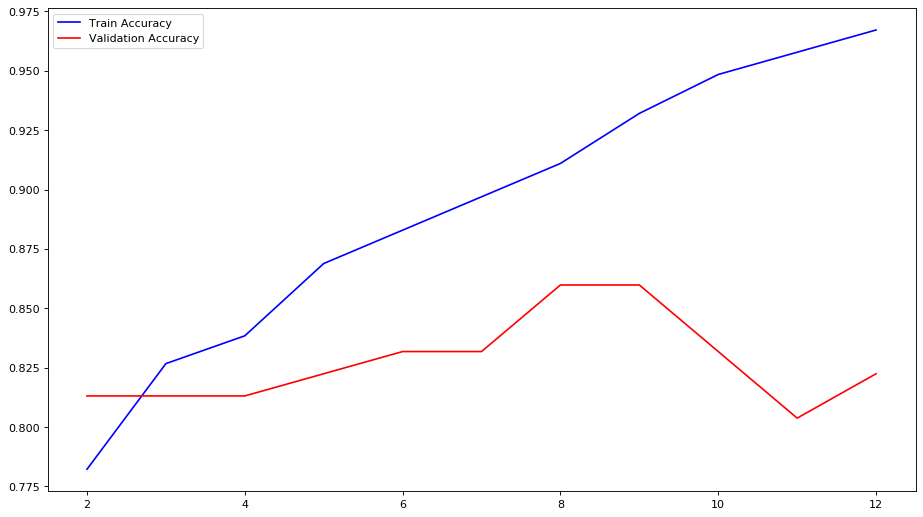

In [53]:
fig = plt.figure(figsize=(14, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(treeResults.Profundidad, treeResults.AccuracyTrain, 'b-',
         treeResults.Profundidad, treeResults.AccuracyVal, 'r-');
plt.legend(("Train Accuracy", "Validation Accuracy"));

In [54]:
tree_final = entrenarArbolDecision(X_train_cv, y_train_cv, max_depth = 7)

(mt.accuracy_score(y_train, tree_final.predict(X_train)), 
mt.accuracy_score(y_val, tree_final.predict(X_val)), 
mt.accuracy_score(y_train_cv, tree_final.predict(X_train_cv)))

(0.8946135831381733, 0.897196261682243, 0.8951310861423221)

In [56]:
import graphviz
dot_data = tree.export_graphviz(tree_final, out_file=None, feature_names=RawTitanic[NumFields].columns.values, class_names=RawTitanic["passenger_survived"].value_counts().index.values,filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render("Imagen/Arbol")

'Imagen\\Arbol.png'

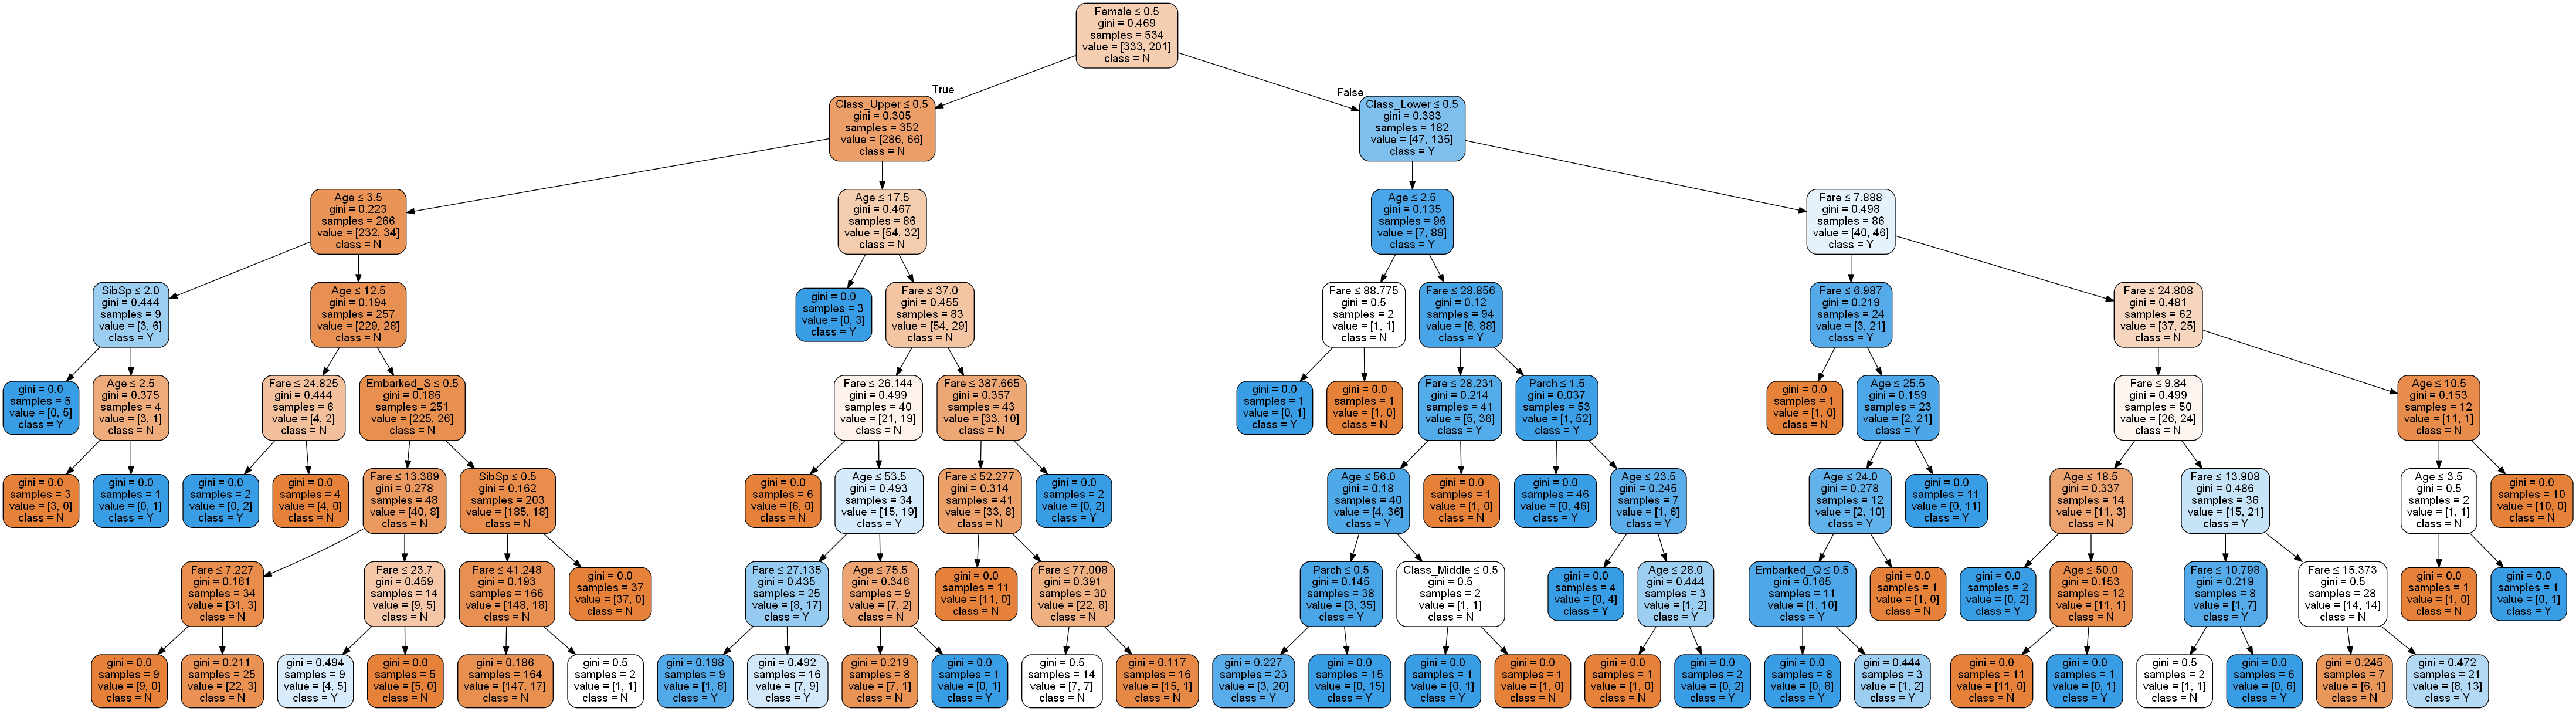

In [57]:
from IPython.display import Image
Image("Imagen/Arbol.png")

# Conclusiones

